# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">Prediction of Graduate Admissions:

- [Problem Statement](#ProblemStatement)
    
    - [Libraries](#Libraries)
    
- [EDA](#EDA) 
    
    - [Dataset Details](#DATA)
    - [Data Dimension](#data_dimension)
    - [Data Preparation](#data_preparation)
    - [Summary statistics](#summary_stats)
    - [Profile Report](#Profile_Report)    
    - [Quantitative Variable](#quantitative)
    - [Qualitative Variable](#qualitative)
   
- [Data Pre-Processing](#data-processing)
    - [Visualize Missing Values using Heatmap](#missing_values)
    - [Imputing with Random Sampling](#random_sampling)
    - [Imputing with Mean or Median](#impute)
    - [Imputing with Random Sampling](#sampling)
    - [Handling Categorical Missing Values](#cat_miss)
    - [Visualization after Handling Missing Values](#visualisation)
    - [Outlier treatment](#outlier)
    - [Treating with IQR](#iqr)
    - [Pairplot visualization w.r.t Categorical variables](#pairplot_visual)
    - [Test for Normality](#distplots)
 
- [Modelling](#model)
    
    - [Linear Regression](#linear)
    - [Pairplot to check multicolinearity](#pairplot_multicolinear)
    - [Scatterplot to check multicolinearity](#scatter_multicolinear)
    - [Data Scaling](#datascaling)
    - [Ridge Regression](#ridge)
    - [Lasso Regression](#lasso)
    - [SGD](#sgd)

<a id='ProblemStatement'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">  Problem Statement

<font color=darkblue>Pursuing higher studies abroad is an aspiration of every student.With this objective student appears for various competative exams such as GRE, TOEFL etc.    
However students are often worried about their chances of getting admission in the international premium universities. 
We as a team have built a solution which aims at releiving Student's anxiety by providing a predictive model which builds the confidence in a student with the chances of getting their admission</font>

In [9]:
import numpy as np
import pandas as pd
pd.options.display.max_rows=None
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error 
from sklearn.model_selection import KFold,RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate,cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from statsmodels .stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV,Lasso
from scipy import stats
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import cross_val_predict

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.iser.essex.ac.uk/system/posts/featured_images/000/002/245/large/graduate.jpg?1502879400")

<a id='EDA'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">  EDA


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">   DATASET Details 
<a id='DATA'></a>

<font color=darkblue> 
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

    1. GRE Scores ( 290 of 340 ) 
    2. TOEFL Scores ( 92 of 125 ) 
    3. University Rating ( 1 of 5 )
    4. Statement of Purpose ( 1 of 5 )  
    5. Letter of Recommendation Strength ( 1 of 5 ) 
    6. Undergraduate GPA ( 6.8 of 10 ) 
    7. Research Experience ( 0 or 1 ) 
    8. Chance of Admit ( ranging from  0.34 to 0.97)

In [11]:
df=pd.read_csv(r'C:\Users\91807\Desktop\Project\final\Admission_Predict_Ver1.2.csv')

In [12]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


<font color=darkblue> 
<b style="color:darkgreen">Serial number</b> is a redundant column as it has unique data for each row and it doesn'nt provide any use information.</font>

In [13]:
df=df.drop('Serial No.',axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


<a id='data_preparation'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">   Data Analysis and Preparation


<a id='data_dimension'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Data Dimension

In [15]:
print("There are", df.shape[0],'rows and',df.shape[1],"columns in the Dataset")

There are 600 rows and 8 columns in the Dataset


<a id='data_preparation'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Check the Information about the data and the datatypes of each respective attributes.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          583 non-null    float64
 1   TOEFL Score        592 non-null    float64
 2   University Rating  592 non-null    float64
 3   SOP                593 non-null    float64
 4   LOR                591 non-null    float64
 5   CGPA               585 non-null    float64
 6   Research           597 non-null    float64
 7   Chance of Admit    600 non-null    float64
dtypes: float64(8)
memory usage: 37.6 KB


<font color=darkblue> 
<b style="color:darkgreen">University Rating</b> and <b style="color:darkgreen">Research</b> have categorical kind of data, hence we are changing its data type.</font>

In [18]:
df['University Rating']=df['University Rating'].astype('object')
df['Research']=df['Research'].astype('object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          583 non-null    float64
 1   TOEFL Score        592 non-null    float64
 2   University Rating  592 non-null    object 
 3   SOP                593 non-null    float64
 4   LOR                591 non-null    float64
 5   CGPA               585 non-null    float64
 6   Research           597 non-null    object 
 7   Chance of Admit    600 non-null    float64
dtypes: float64(6), object(2)
memory usage: 37.6+ KB


In [22]:
df1=df.copy()
data=df.copy()

<a id='summary_stats'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Summary Statistics

In [23]:
df.describe()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
count,583.000000,592.000000,593.000000,591.000000,585.000000,600.000000
mean,316.488851,107.170608,3.368465,3.463621,8.560085,0.721467
std,11.245440,6.138526,0.979296,0.940580,0.600405,0.139846
min,290.000000,92.000000,1.000000,1.000000,6.800000,0.340000
25%,308.000000,103.000000,2.500000,3.000000,8.120000,0.630000
50%,317.000000,107.000000,3.500000,3.500000,8.540000,0.720000
75%,325.000000,111.250000,4.000000,4.000000,9.020000,0.820000
max,340.000000,125.000000,5.000000,5.000000,9.920000,0.970000


In [24]:
df.describe(include='object')

,University Rating,Research
count,592.0,597.0
unique,5.0,2.0
top,3.0,1.0
freq,200.0,338.0


<a id='quantitative'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Quantitative Variable

In [30]:
num_data=df.select_dtypes(include=np.number)

In [31]:
print('\033[1m'+ 'Numerical columns are :- \n\n\033[0m',num_data.columns)

Numerical columns are :- 

 Index(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit '], dtype='object')


<a id='qualitative'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Qualitative Variable

In [32]:
cat_data=df.select_dtypes(exclude=np.number)

In [33]:
print('\033[1m'+'Categorical columns are :- \n\n\033[0m',cat_data.columns,'\n\n')

Categorical columns are :- 

 Index(['University Rating', 'Research'], dtype='object') 




<a id='qualitative'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">   Unique Values

In [34]:
for i in num_data:
    print('\033[1m'+i+'\033[0m')
    print(num_data[i].unique(),'\n')

GRE Score
[337. 324. 316. 322. 314. 330. 321. 308. 302. 323. 325. 327. 333. 328.
 307. 311. 317. 319. 318. 303. 312. 334. 336. 340. 298. 295. 310. 300.
 338. 331. 320.  nan 304. 313. 332. 326. 329. 339. 309. 315. 301. 296.
 294. 299. 306. 305. 290. 335. 297. 293.] 

TOEFL Score
[118. 107. 104. 110. 103. 115. 109. 101. 102. 108. 106. 111. 125. 112.
 105. 114. 116. 119. 120.  98.  93.  99.  97. 117. 113.  nan 100.  95.
  96.  94.  92.] 

SOP
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5 nan] 

LOR 
[4.5 3.5 2.5 3.  4.  1.5 5.  2.  nan 1. ] 

CGPA
[9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
  nan 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45
 9.04 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76
 7.92 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78
 9.18 9.46 9.38 8.48 8.68 8.34 8.45 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.0

<a id='data-processing'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">Data Pre-Processing

<a id='random_sampling'></a>
## <b style="color:black">Handling Null values</b>

<font color=darkblue> 
Missing values are the Achilles’s heel for a data scientist. If not handled properly, the entire analysis will be futile and provide misleading results which could potentially harm the business stakeholders.</font>

In [40]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.istockphoto.com/photos/creative-completes-the-black-puzzle-putting-the-last-missing-piece-picture-id647707336?k=6&m=647707336&s=612x612&w=0&h=ak98dxZ08FTedpgLfe85BsZUlV9lp3rSl4VLILUgNCY=")

<font color=black> 
Null Values are detected and its percentage are calculated for Inputation</font>

In [36]:
# type your code here
Miss_Count = df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum()*100 / df.isnull().count()).sort_values(ascending=False)
miss_df = pd.concat([Miss_Count, Percent], axis=1, keys=['Miss_Count', 'Percent'])
miss_df

,Miss_Count,Percent
GRE Score,17,2.833333
CGPA,15,2.500000
LOR,9,1.500000
University Rating,8,1.333333
TOEFL Score,8,1.333333
SOP,7,1.166667
Research,3,0.500000
Chance of Admit,0,0.000000


<a id='missing_values'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black;">Visualize Missing Values using Heatmap

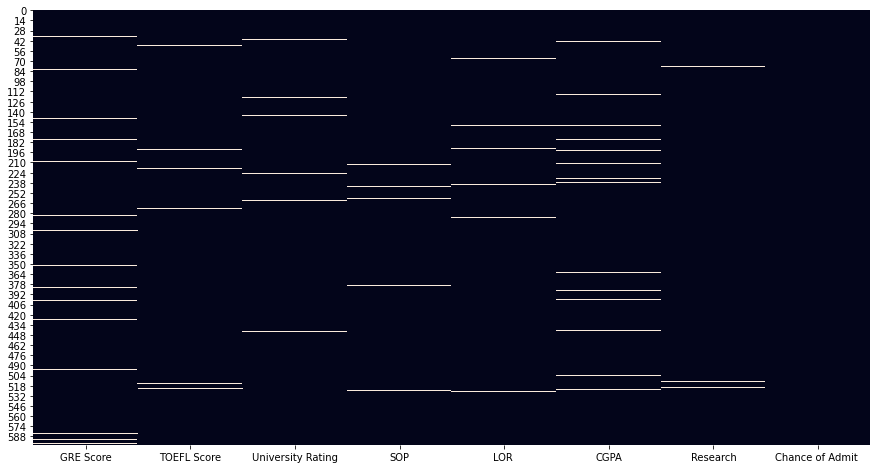

In [37]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df.isnull(), cbar=False)
plt.show()

<a id='data_processing'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">
<a id='random_sampling'></a>
## <b style="color:black">Imputing with Random Sampling</b>

In [20]:
def impute_nan_random(df,variable):
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    df[variable+'_random']=df[variable]
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [21]:
for column in df.columns:
    if(column=='University Rating' or column=='Research'):
        continue
    else:
        impute_nan_random(df,column)

In [22]:
df.isnull().sum()

GRE Score                  17
TOEFL Score                 8
University Rating           8
SOP                         7
LOR                         9
CGPA                       15
Research                    3
Chance of Admit             0
GRE Score_random            0
TOEFL Score_random          0
SOP_random                  0
LOR _random                 0
CGPA_random                 0
Chance of Admit _random     0
dtype: int64

<a id='impute'></a>
## <b style="color:black">Imputing with Mean or Median</b>

### <b style="color:teal">GRE Score</b>

In [23]:
df1['GRE Score'].isnull().sum()

17

<AxesSubplot:xlabel='GRE Score'>

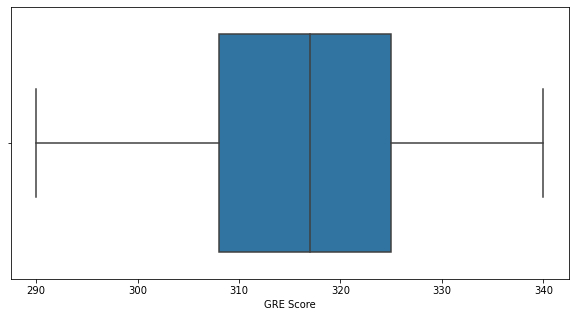

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['GRE Score'])

<b>Interpretation: </b> There are no Outliers in GRE score. Hence imputing with mean

In [25]:
df1['GRE Score'].mean()

316.48885077186964

In [26]:
df1['GRE Score'].replace(np.nan,df1['GRE Score'].mean(),inplace=True)

In [27]:
df1['GRE Score'].isnull().sum()

0

### <b style="color:teal">TOFEL Score</b>

8


<AxesSubplot:xlabel='TOEFL Score'>

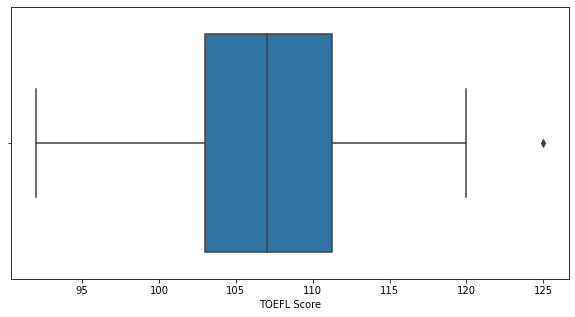

In [28]:
print(df1['TOEFL Score'].isnull().sum())

plt.figure(figsize=(10,5))
sns.boxplot(x=df1['TOEFL Score'])

<b>Interpretation: </b> There is one Outlier in TOEFL score. Hence imputing with median

In [29]:
df1['TOEFL Score'].replace(np.nan,df1['TOEFL Score'].median(),inplace=True)
df1['TOEFL Score'].isnull().sum()

0

### <b style="color:teal">SOP</b>

7


<AxesSubplot:xlabel='SOP'>

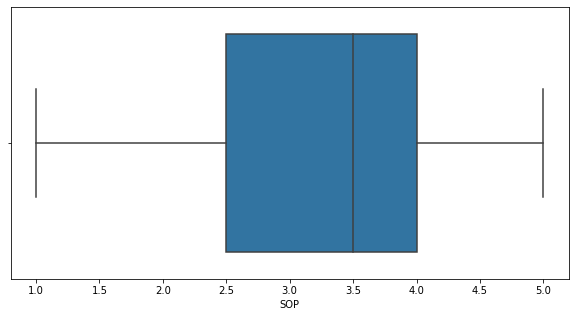

In [30]:
print(df1['SOP'].isnull().sum())

plt.figure(figsize=(10,5))
sns.boxplot(x=df1['SOP'])

<b>Interpretation: </b> There are no Outliers in SOP. Hence imputing with mean

In [31]:
df1['SOP'].replace(np.nan,df1['SOP'].mean(),inplace=True)
df1['SOP'].isnull().sum()

0

### <b style="color:teal">LOR</b>

9


<AxesSubplot:xlabel='LOR '>

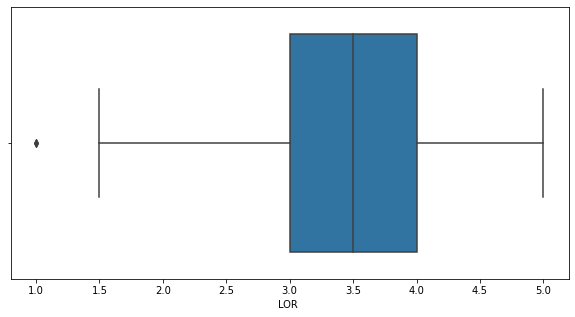

In [32]:
print(df1['LOR '].isnull().sum())

plt.figure(figsize=(10,5))
sns.boxplot(x=df1['LOR '])

<b>Interpretation: </b> There are Outliers in LOR. Hence imputing with median

In [33]:
df1['LOR '].replace(np.nan,df1['LOR '].median(),inplace=True)
df1['LOR '].isnull().sum()

0

### <b style="color:teal">CGPA</b>

15


<AxesSubplot:xlabel='CGPA'>

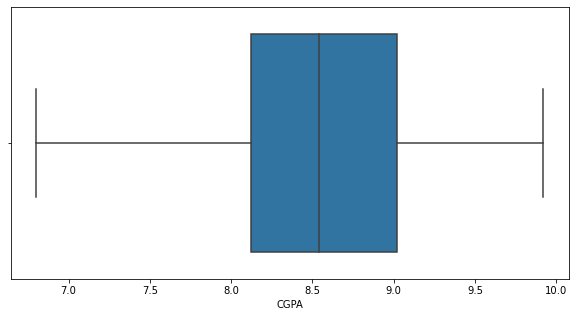

In [34]:
print(df1['CGPA'].isnull().sum())

plt.figure(figsize=(10,5))
sns.boxplot(x=df1['CGPA'])

<b>Interpretation: </b> There are no Outliers in LOR. Hence imputing with mean

In [35]:
df1['CGPA'].replace(np.nan,df1['CGPA'].mean(),inplace=True)
df1['CGPA'].isnull().sum()

0

In [36]:
print(df1.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    8
SOP                  0
LOR                  0
CGPA                 0
Research             3
Chance of Admit      0
dtype: int64


In [37]:
num_data=df.select_dtypes(include=np.number)
num_data1=df1.select_dtypes(include=np.number)
num_data2=data.select_dtypes(include=np.number)

In [38]:
num_data=num_data.drop(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ','Chance of Admit _random'],axis=1)


In [39]:
num_dat1=num_data1.drop(['Chance of Admit '],axis=1)

In [40]:

num_dat2=num_data2.drop(['Chance of Admit '],axis=1)

In [41]:
print(num_data.shape,num_dat1.shape,num_dat2.shape)

(600, 5) (600, 5) (600, 5)


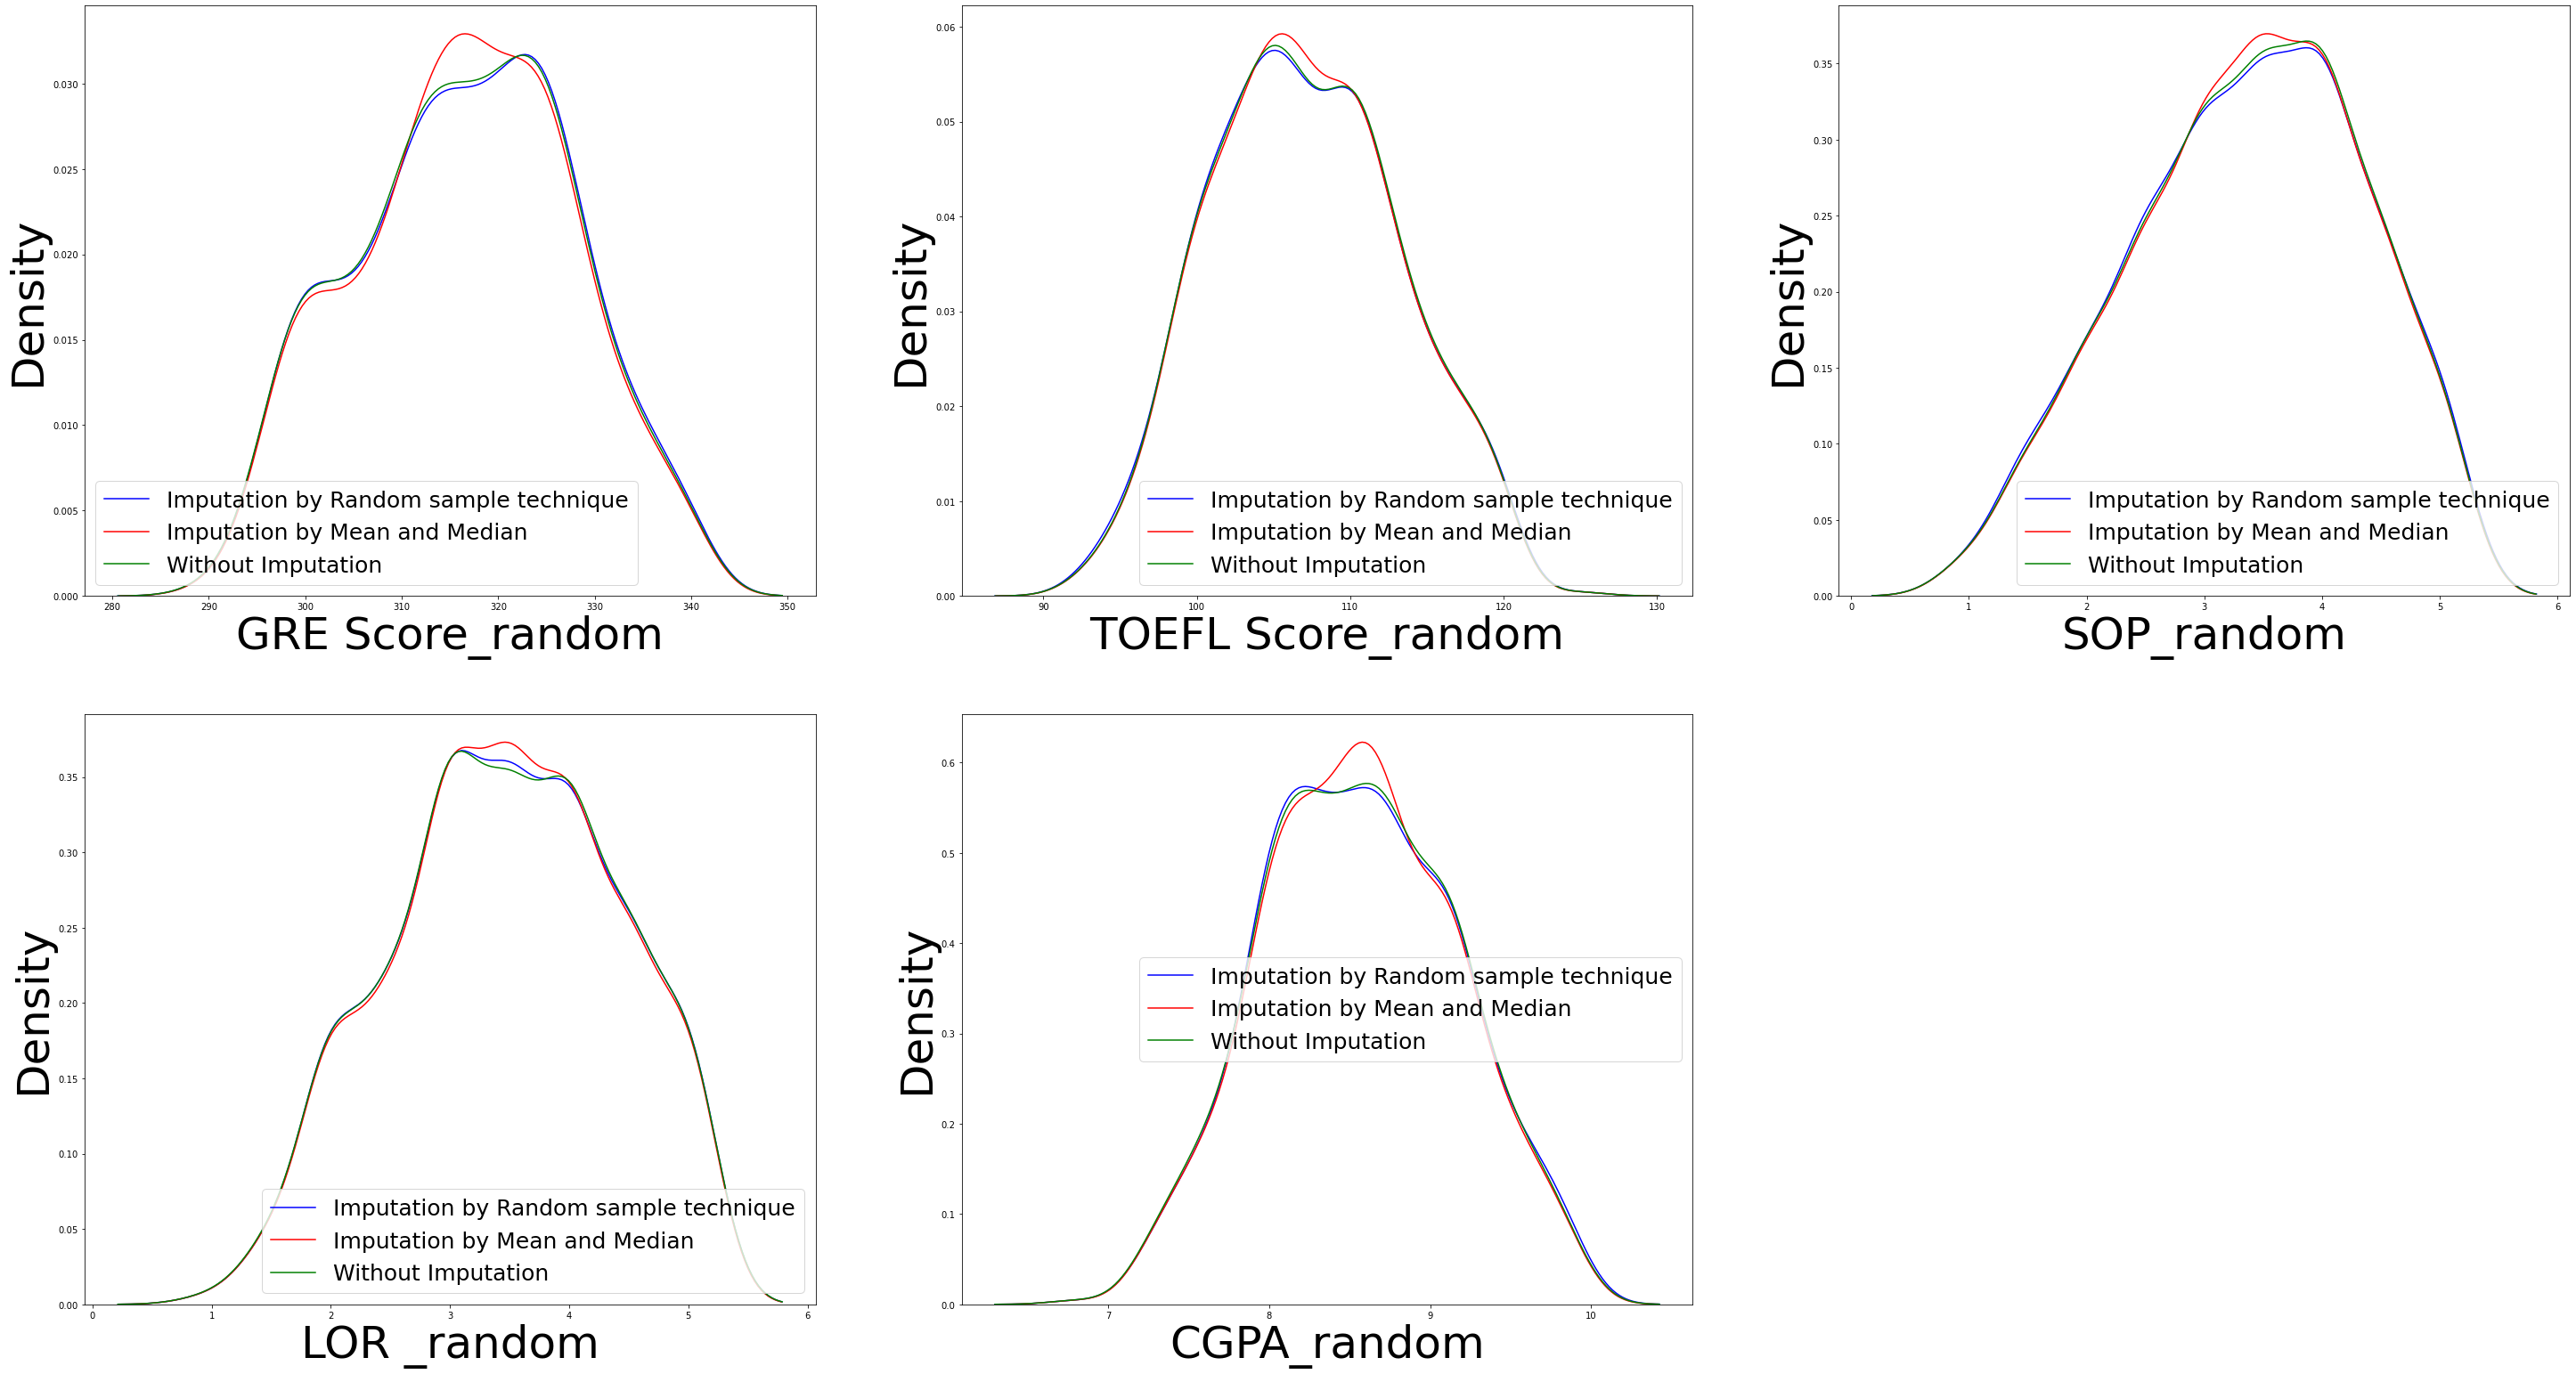

In [42]:
plt.figure(figsize=(50,100))
a=num_data.columns
j=1
for i in range(0,num_data.shape[1]):
    plt.subplot(7,3,j)
    sns.kdeplot(num_data.iloc[:,i],color='b',label='Imputation by Random sample technique')
    sns.kdeplot(num_data1.iloc[:,i],color='r',label='Imputation by Mean and Median')
    sns.kdeplot(num_data2.iloc[:,i],color='g',label='Without Imputation')
    plt.xlabel(a[i],size = 50)
    plt.ylabel('Density', size = 50)
    plt.legend(loc="best",prop={'size': 25})
    j=j+1
    

<a id='sampling'></a>
## <b style="color:black">Imputing with Random Sampling for Final Data</b>

In [43]:
num_data.columns

Index(['GRE Score_random', 'TOEFL Score_random', 'SOP_random', 'LOR _random',
       'CGPA_random'],
      dtype='object')

In [44]:
data['GRE Score']=num_data['GRE Score_random']
data['TOEFL Score']=num_data['TOEFL Score_random']
data['SOP']=num_data['SOP_random']
data['LOR ']=num_data['LOR _random']
data['CGPA']=num_data['CGPA_random']

In [45]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    8
SOP                  0
LOR                  0
CGPA                 0
Research             3
Chance of Admit      0
dtype: int64

<a id='cat_miss'></a>
# <b style="color:black">Handling Categorical Missing Values</b>

### <b style="color:teal">University Rating</b>

In [46]:
print(data['University Rating'].isnull().sum())
data['University Rating'].value_counts()

8


3.0    200
2.0    142
4.0    126
5.0     85
1.0     39
Name: University Rating, dtype: int64

In [47]:
data['University Rating'].replace(np.nan,3.0,inplace=True)
data['University Rating'].isnull().sum()

0

### <b style="color:teal">Research</b>


In [48]:
print(data['Research'].isnull().sum())
data['Research'].value_counts()

3


1.0    338
0.0    259
Name: Research, dtype: int64

In [49]:
data['Research'].replace(np.nan,1.0,inplace=True)
data['Research'].isnull().sum()

0

In [50]:
print(data.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


<a id='visualisation'></a>
# <b style="color:black">Visualization after Handling Missing Values</b>

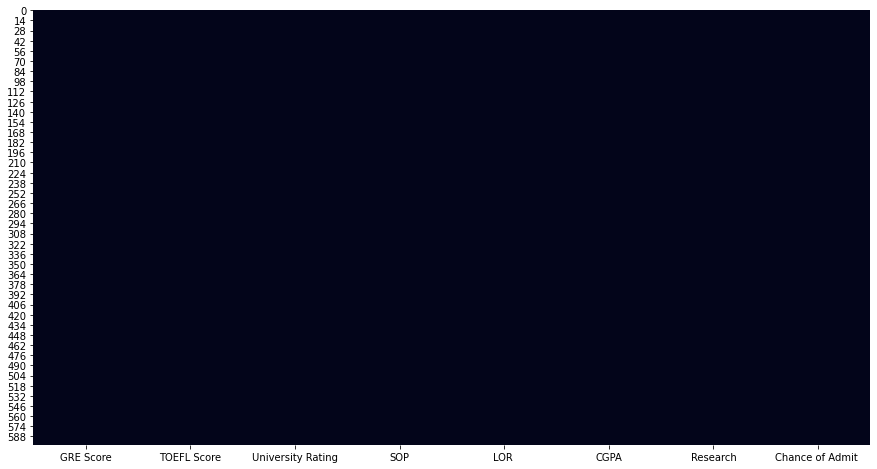

In [51]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(data.isnull(), cbar=False)

# display the plot
plt.show()

<a id='outlier'></a>
# <b style="color:black">Outlier treatment</b>

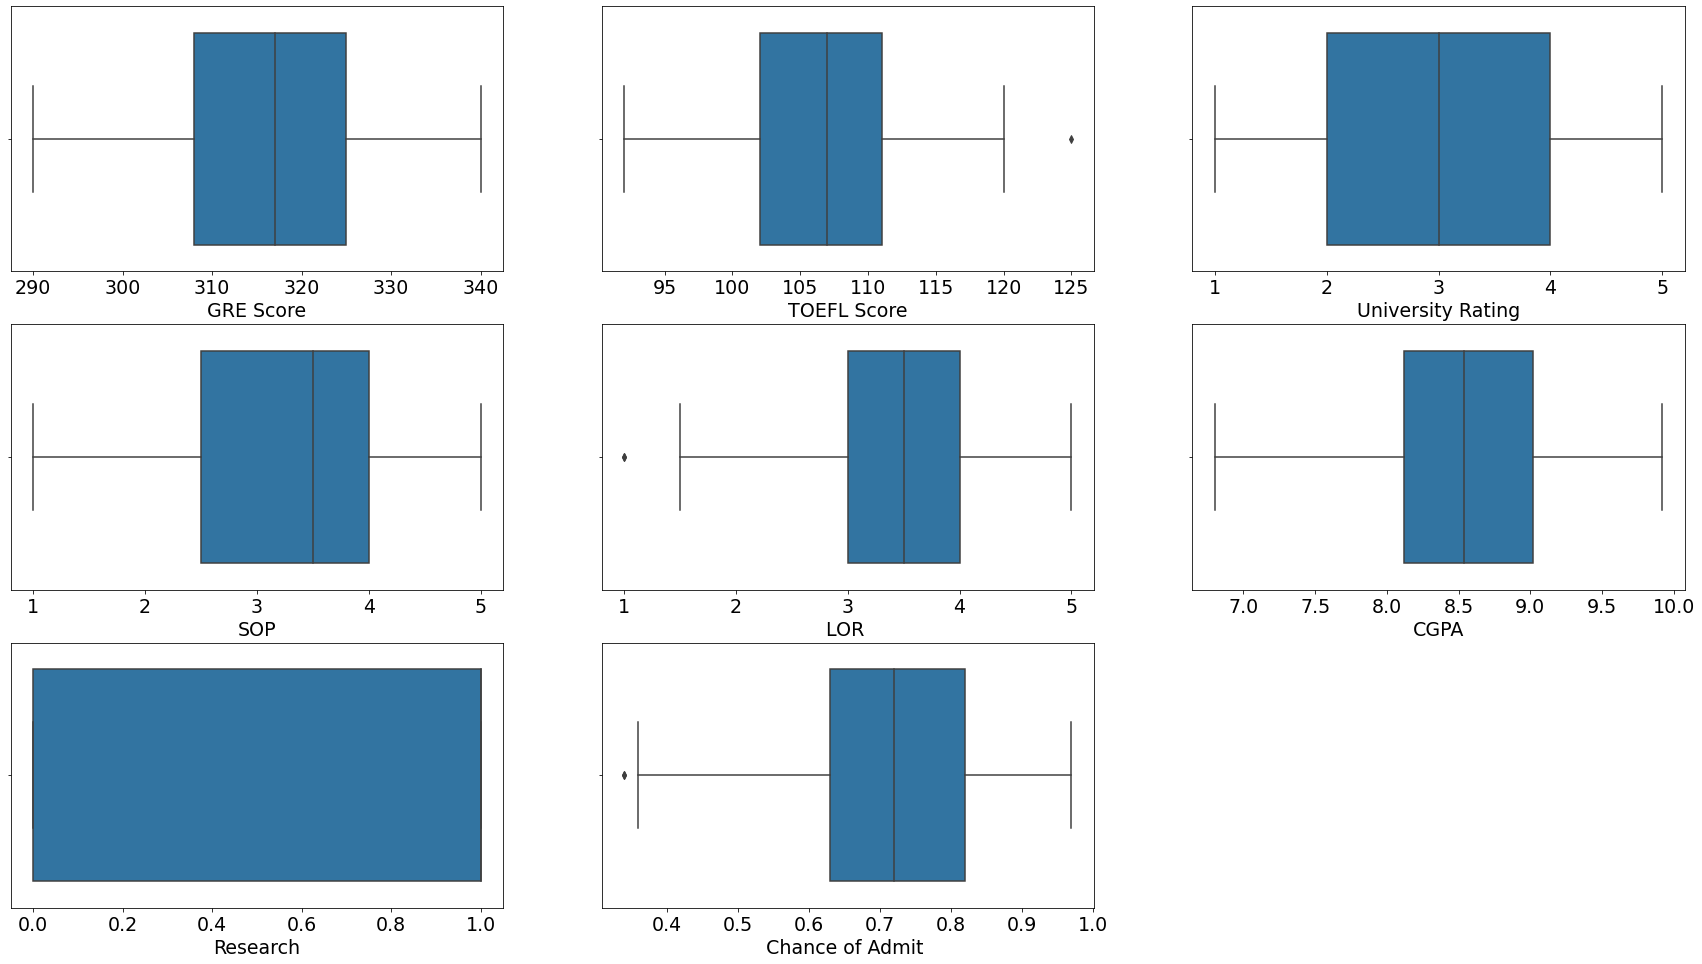

In [52]:

plt.rcParams.update({'font.size': 19})
plt.figure(figsize=(30,40))
a=data.columns
j=1
for i in range(0,data.shape[1]):
    plt.subplot(7,3,j)
    sns.boxplot(x=data.iloc[:,i])
    j=j+1
    

<b>Interpretation: </b> Outliers are present in TOEFL Score, LOR, Chance of Admit

<a id='iqr'></a>
## <b style="color:black">Treating with IQR</b>

### <b style="color:teal">Chance of Admit</b>


In [53]:
Q1=data['Chance of Admit '].quantile(0.25)
Q3=data['Chance of Admit '].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR,Q1-1.5*IQR,Q3+1.5*IQR)

0.63 0.82 0.18999999999999995 0.3450000000000001 1.105


In [54]:
data=data[~((data['Chance of Admit ']<(Q1-1.5*IQR))|(data['Chance of Admit ']>(Q3+1.5*IQR)))]

In [55]:
data.shape

(598, 8)

### <b style="color:teal">TOEFL Score</b>


In [56]:
Q1=data['TOEFL Score'].quantile(0.25)
Q3=data['TOEFL Score'].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR,Q1-1.5*IQR,Q3+1.5*IQR)

103.0 111.0 8.0 91.0 123.0


In [57]:
data[((data['TOEFL Score']<(Q1-1.5*IQR))|(data['TOEFL Score']>(Q3+1.5*IQR)))]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
12,333.0,125.0,2.0,5.0,5.0,8.0,0.0,0.9


In [58]:
df_out=data[((data['TOEFL Score']<(Q1-1.5*IQR))|(data['TOEFL Score']>(Q3+1.5*IQR)))]

In [59]:
df_out

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
12,333.0,125.0,2.0,5.0,5.0,8.0,0.0,0.9


In [60]:
data['TOEFL Score'].replace(df_out['TOEFL Score'].values,Q3+1.5*IQR,inplace=True)

### <b style="color:teal">LOR</b>


In [61]:
Q1=data['LOR '].quantile(0.25)
Q3=data['LOR '].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR,Q1-1.5*IQR,Q3+1.5*IQR)

3.0 4.0 1.0 1.5 5.5


In [62]:
data[((data['LOR ']<(Q1-1.5*IQR))|(data['LOR ']>(Q3+1.5*IQR)))]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
348,299.0,94.0,1.0,1.0,1.0,7.34,0.0,0.42
580,299.0,94.0,1.0,1.0,1.0,7.34,0.0,0.42


In [63]:
df_out=data[((data['LOR ']<(Q1-1.5*IQR))|(data['LOR ']>(Q3+1.5*IQR)))]

In [64]:
df_out

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
348,299.0,94.0,1.0,1.0,1.0,7.34,0.0,0.42
580,299.0,94.0,1.0,1.0,1.0,7.34,0.0,0.42


In [65]:
data['LOR '].replace(df_out['LOR '].values,Q3+1.5*IQR,inplace=True)

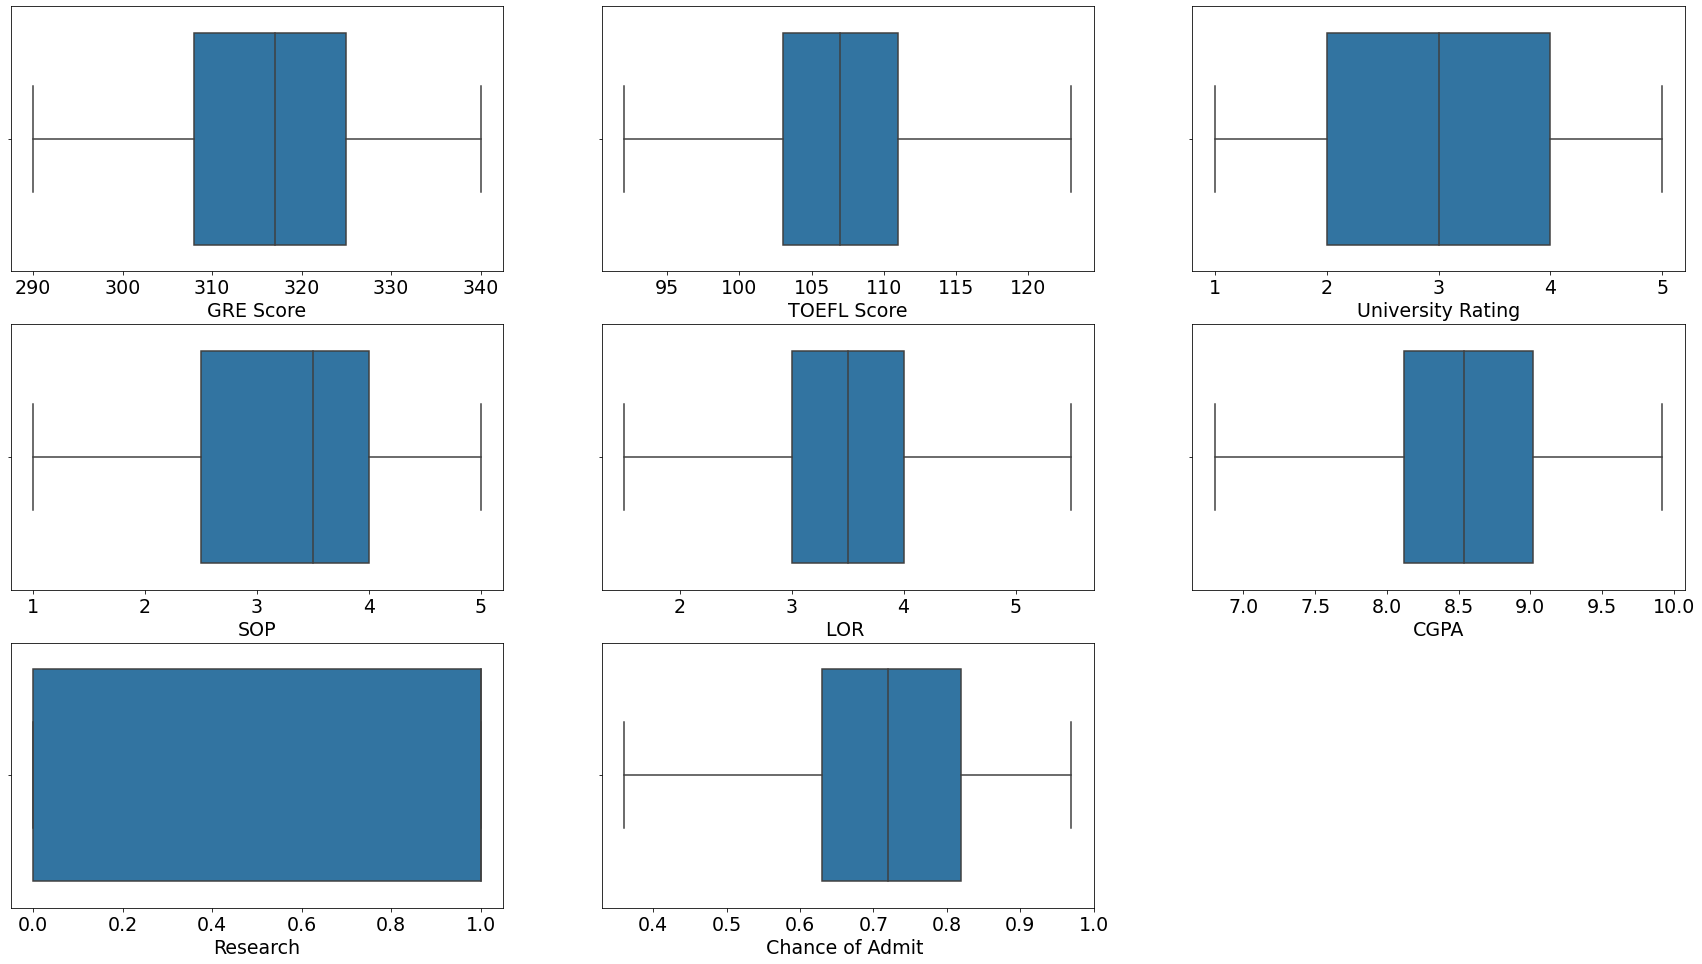

In [66]:

plt.rcParams.update({'font.size': 19})
plt.figure(figsize=(30,40))
a=data.columns
j=1
for i in range(0,data.shape[1]):
    plt.subplot(7,3,j)
    sns.boxplot(x=data.iloc[:,i])
    j=j+1
    

<b>Interpretation:</b>No outliers present now
    

In [67]:
data.std()

GRE Score            11.260217
TOEFL Score           6.146807
University Rating     1.122203
SOP                   0.986630
LOR                   0.935345
CGPA                  0.601496
Research              0.495457
Chance of Admit       0.138323
dtype: float64

In [68]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.789940,0.604213,0.591370,0.498483,0.772022,0.525439,0.780885
TOEFL Score,0.789940,1.000000,0.628321,0.626995,0.502061,0.769677,0.441799,0.787078
University Rating,0.604213,0.628321,1.000000,0.709731,0.558431,0.683603,0.429368,0.690041
SOP,0.591370,0.626995,0.709731,1.000000,0.598529,0.670474,0.409392,0.684674
LOR,0.498483,0.502061,0.558431,0.598529,1.000000,0.571382,0.328097,0.607398
CGPA,0.772022,0.769677,0.683603,0.670474,0.571382,1.000000,0.471330,0.847463
Research,0.525439,0.441799,0.429368,0.409392,0.328097,0.471330,1.000000,0.539784
Chance of Admit,0.780885,0.787078,0.690041,0.684674,0.607398,0.847463,0.539784,1.000000


<AxesSubplot:>

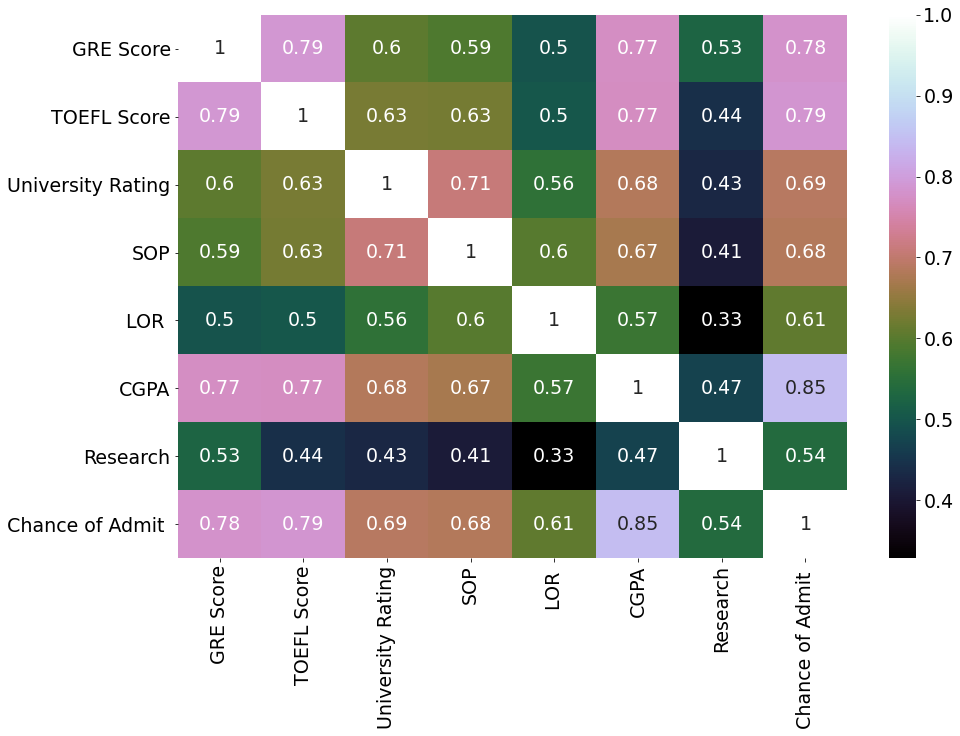

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='cubehelix',
annot=True)

<a id='pairplot_visual'></a>
## <b style="color:black">Pairplot visualization w.r.t Categorical variables </b>

<Figure size 2160x2160 with 0 Axes>

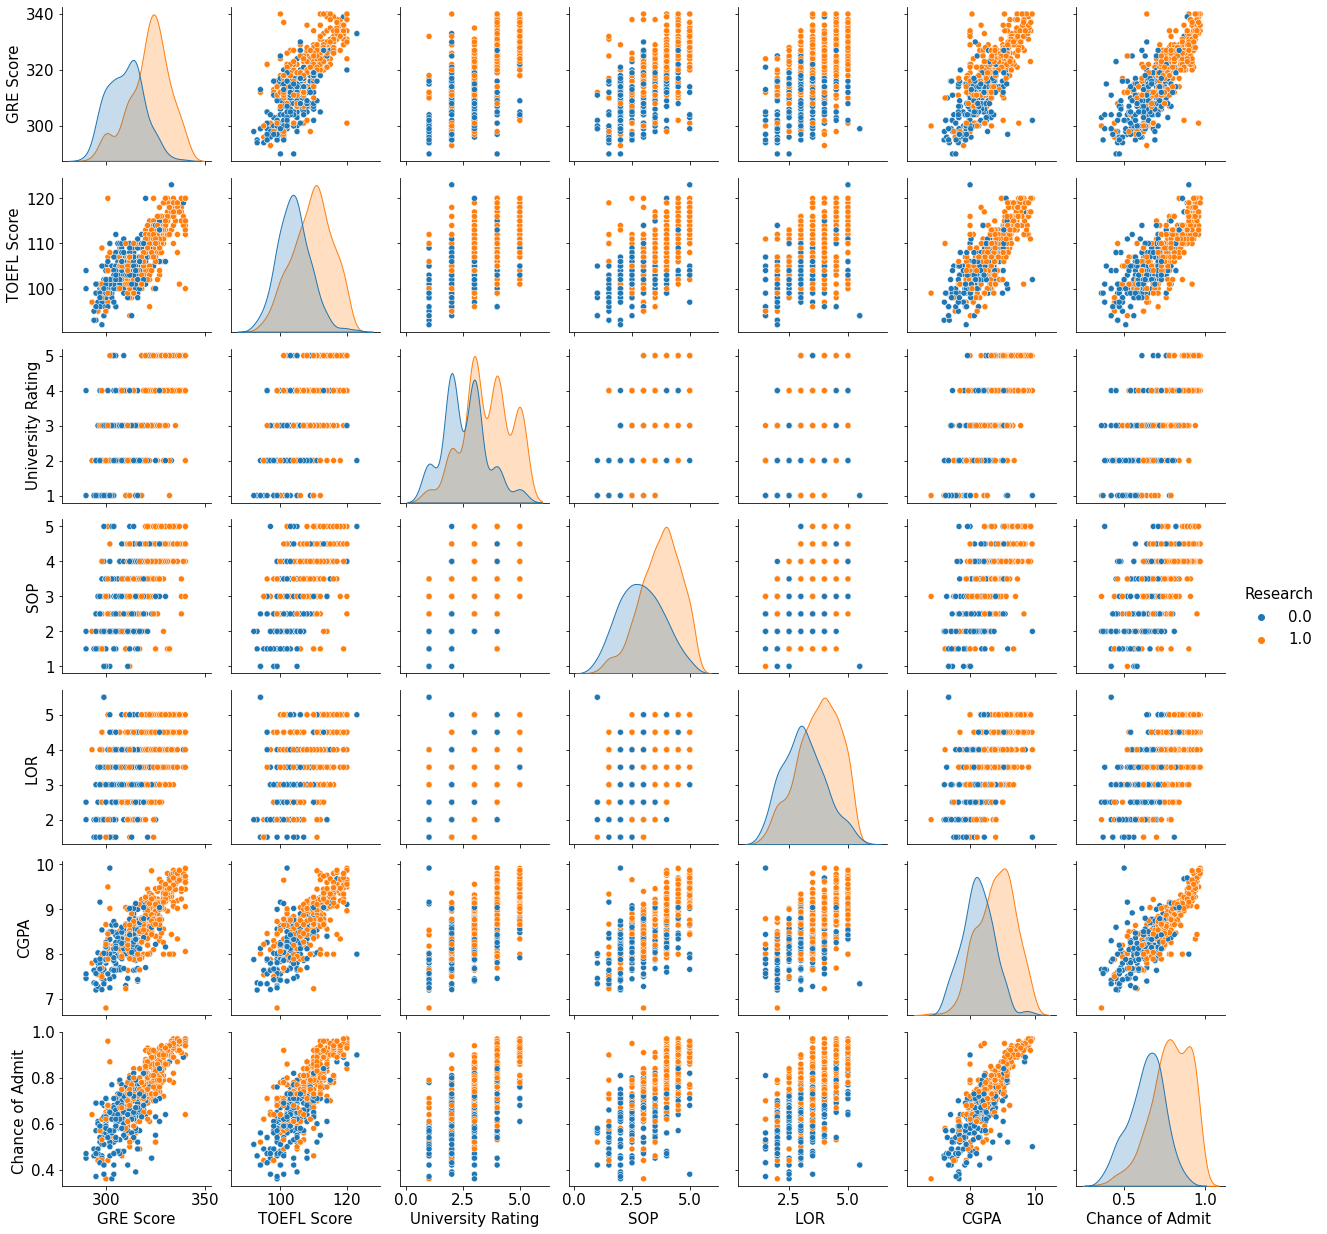

In [70]:
plt.figure(figsize=(30,30))
plt.rcParams.update({'font.size': 15})
sns.pairplot(data,hue='Research');

<Figure size 2160x2160 with 0 Axes>

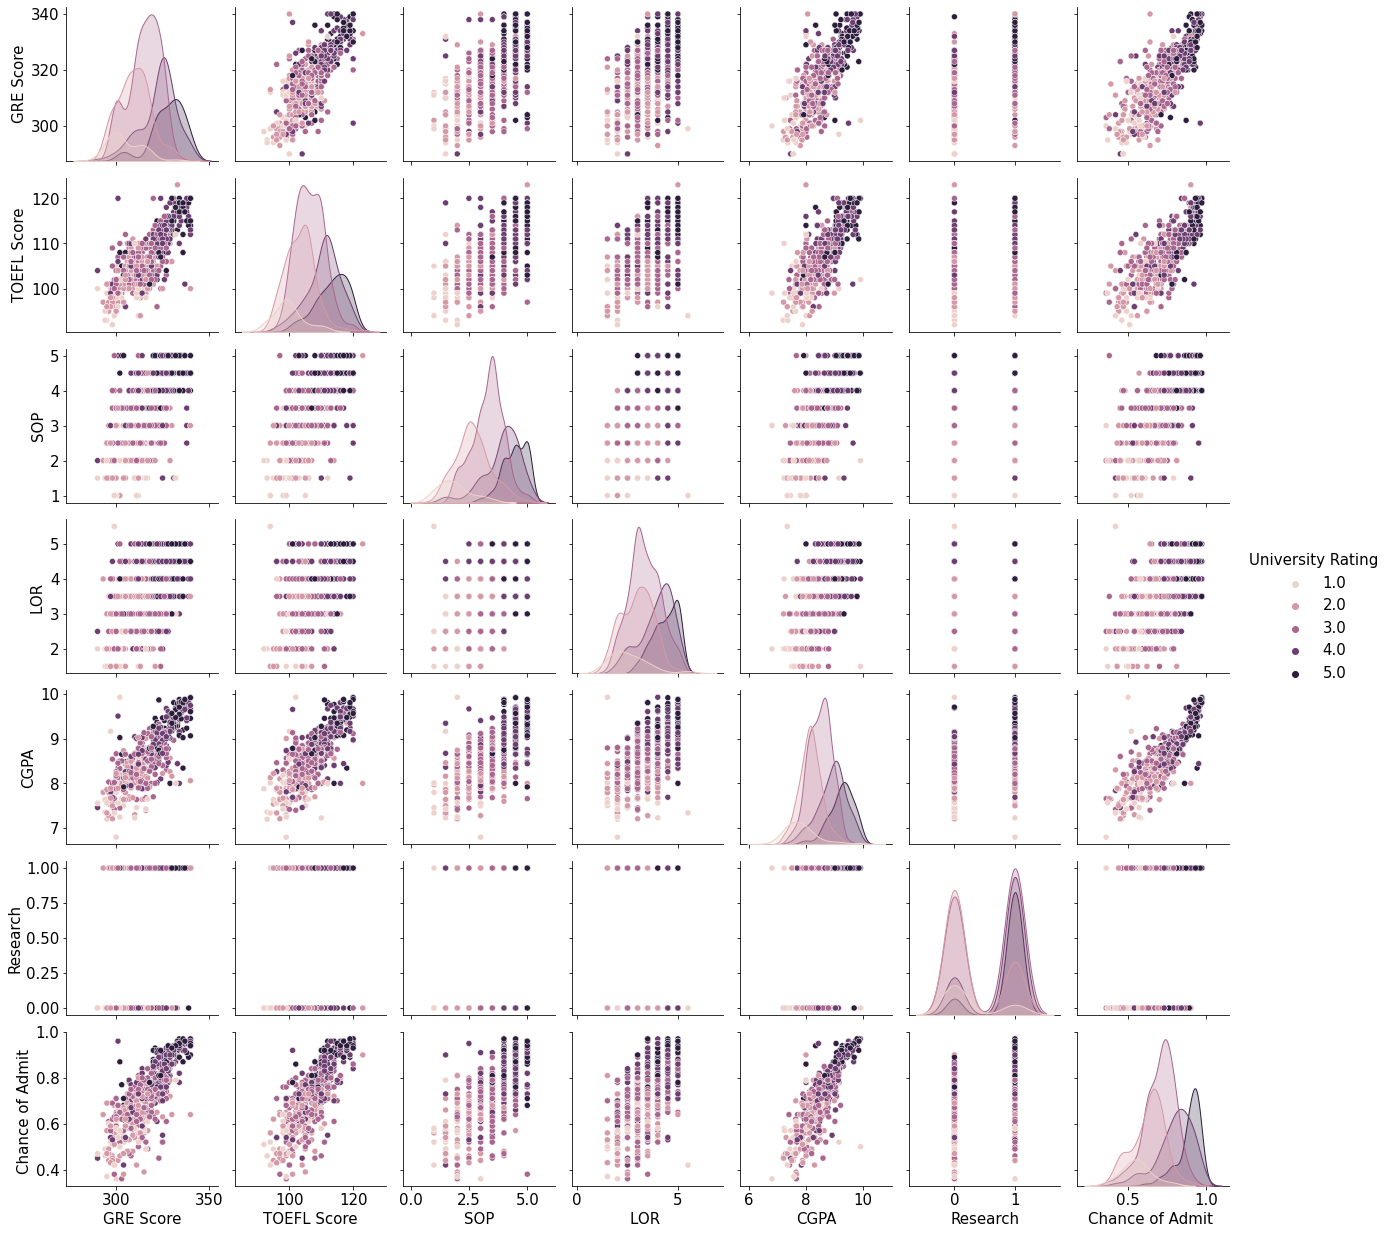

In [71]:
plt.figure(figsize=(30,30))
plt.rcParams.update({'font.size': 15})
sns.pairplot(data,hue='University Rating')

<a id='distplots'></a>
## <b style="color:black">Test for Normality </b>

In [72]:
for column in data.columns:
    DatatoTest = data[column]
    stat,p = stats.shapiro(DatatoTest)
    print('\033[1m',column,'\033[0m')
    print('stat=%.2f, p=%.30f' % (stat, p))
    if p > 0.05:
        print('Normal Distribution')
    else:
        print('Not a normal distribution')

 GRE Score 
stat=0.98, p=0.000004576262654154561460018158
Not a normal distribution
 TOEFL Score 
stat=0.99, p=0.000060919282987015321850776672
Not a normal distribution
 University Rating 
stat=0.91, p=0.000000000000000003817852530829
Not a normal distribution
 SOP 
stat=0.96, p=0.000000000005707607997340602424
Not a normal distribution
 LOR  
stat=0.96, p=0.000000000002253751872627329789
Not a normal distribution
 CGPA 
stat=0.99, p=0.002694559516385197639465332031
Not a normal distribution
 Research 
stat=0.63, p=0.000000000000000000000000000000
Not a normal distribution
 Chance of Admit  
stat=0.98, p=0.000000633048443887673784047365
Not a normal distribution


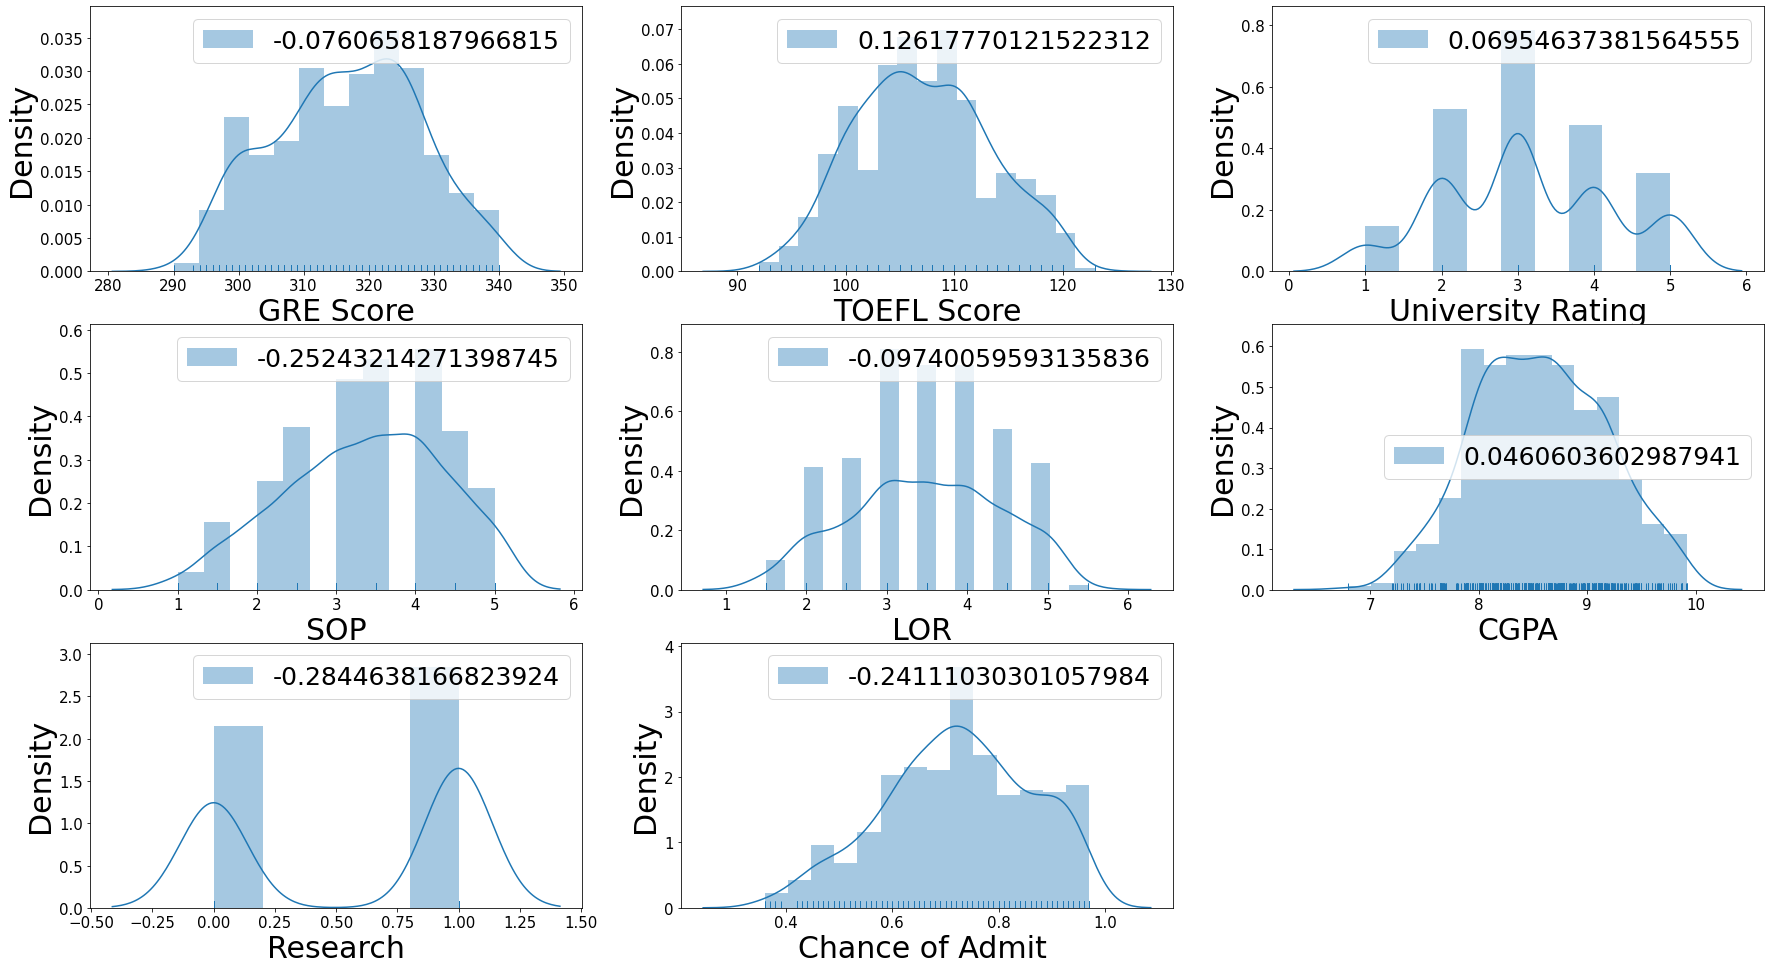

In [73]:
plt.figure(figsize=(30,40))
a=data.columns
j=1
for i in range(0,data.shape[1]):
    plt.subplot(7,3,j)
    sns.distplot(data.iloc[:,i],kde=True,rug=True,label=data.iloc[:,i].skew())
    plt.xlabel(a[i],size = 30)
    plt.ylabel('Density', size = 30)
    plt.legend(loc="best",prop={'size': 25})
    j=j+1
    

<a id='model'></a>
## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:black;">  Modelling
<a id='linear'></a>
# <b style="color:black">Linear Regression</b>

### <b style="color:Teal">Using Sklearn</b>

In [74]:
X=data.drop('Chance of Admit ',axis=1)

Y=data['Chance of Admit ']

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [76]:
lm=LinearRegression()

In [77]:
model=lm.fit(X_train,Y_train)

In [78]:
print("\033[1mIntercept: \033[0m",model.intercept_)
print("\033[1mCoefficients: \033[0m",model.coef_)

pred=model.predict(X_test)

print('\033[1mR^2:\033[0m', r2_score(Y_test, pred))

accuracy=(explained_variance_score(Y_test,pred))*100
print('\033[1mAccuracy:\033[0m',accuracy)
R2=r2_score(Y_test, pred)
print('\033[1mRoot Mean Squared Error:\033[0m',rmse(Y_test, pred))
Adj_r2 = 1 - (1-R2)*(len(Y_test)-1)/(len(Y_test)- X_test.shape[1]-1)
print('\033[1mAdj_r2:\033[0m',Adj_r2)
residuals=np.array(Y_test-pred)

Intercept:  -1.1922917971572002
Coefficients:  [0.00193448 0.00409017 0.0102928  0.01171175 0.01446478 0.08462944
 0.02826882]
R^2: 0.765317047260662
Accuracy: 76.64469258036003
Root Mean Squared Error: 0.06726443932442293
Adj_r2: 0.7537481693087228


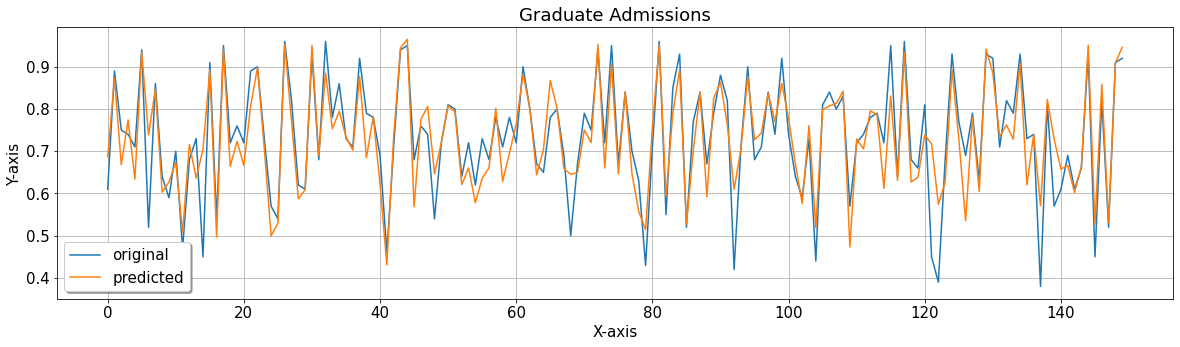

In [79]:
plt.figure(figsize=(20,5))
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("Graduate Admissions")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

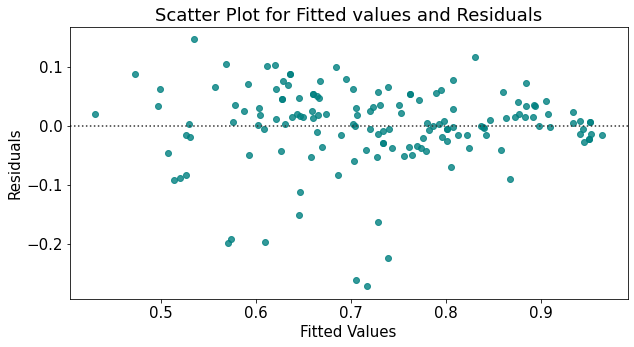

In [80]:
plt.figure(figsize=(10,5))
sns.residplot(x = pred, y = residuals, color='teal')
plt.title('Scatter Plot for Fitted values and Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [81]:
comp = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared'])

In [82]:
a = pd.Series({
                     'Model_Name': "Linear regression",
                     'R-Squared': r2_score(Y_test, pred),
                     'Adj. R-Squared': Adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression,0.765317,0.753748


<a id='multicolinear'></a>
# <b style="color:black">Multicolinearity</b>

In [83]:
vif_data1=pd.DataFrame()

vif_data1['features']=data.columns

vif_data1['VIF']=[variance_inflation_factor(data.values,i) for i in range(0,len(data.columns))]

print(vif_data1)

            features          VIF
0          GRE Score  1202.310458
1        TOEFL Score  1067.852130
2  University Rating    21.766343
3                SOP    32.234425
4               LOR     26.678400
5               CGPA   872.061806
6           Research     3.316774
7   Chance of Admit    113.719021


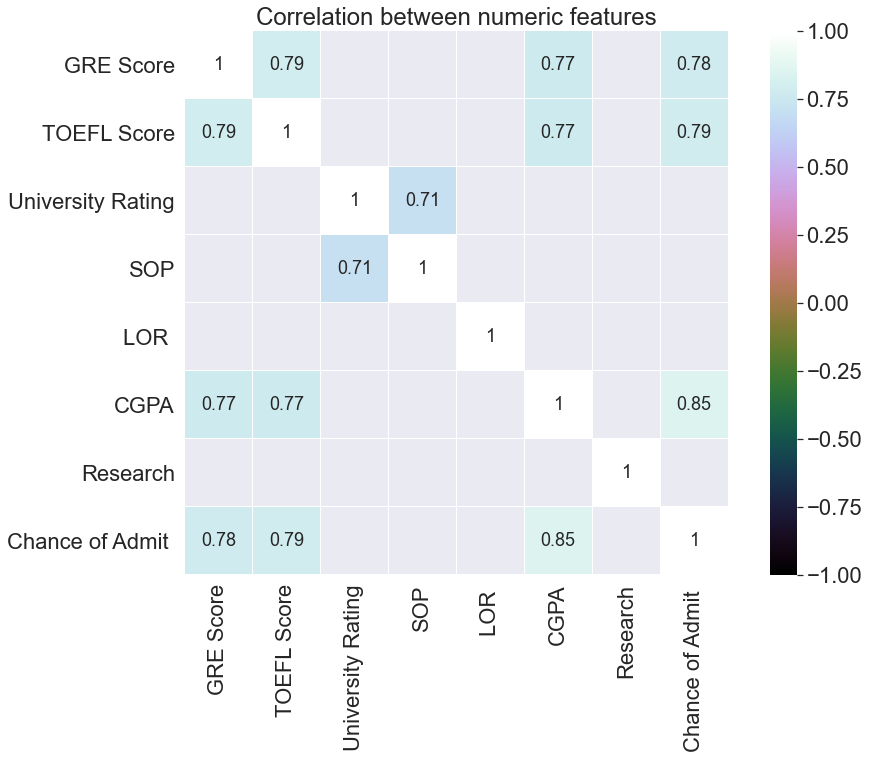

In [84]:
corr=data.corr()
plt.figure(figsize=(15, 10))

sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True, annot_kws={"size": 18},cmap='cubehelix', square=True);

# specify name of the plot
plt.title('Correlation between numeric features')
plt.show()

<a id='pairplot_multicolinear'></a>
## <b style="color:black">Pairplot to check multicolinearity</b>

<Figure size 2160x2160 with 0 Axes>

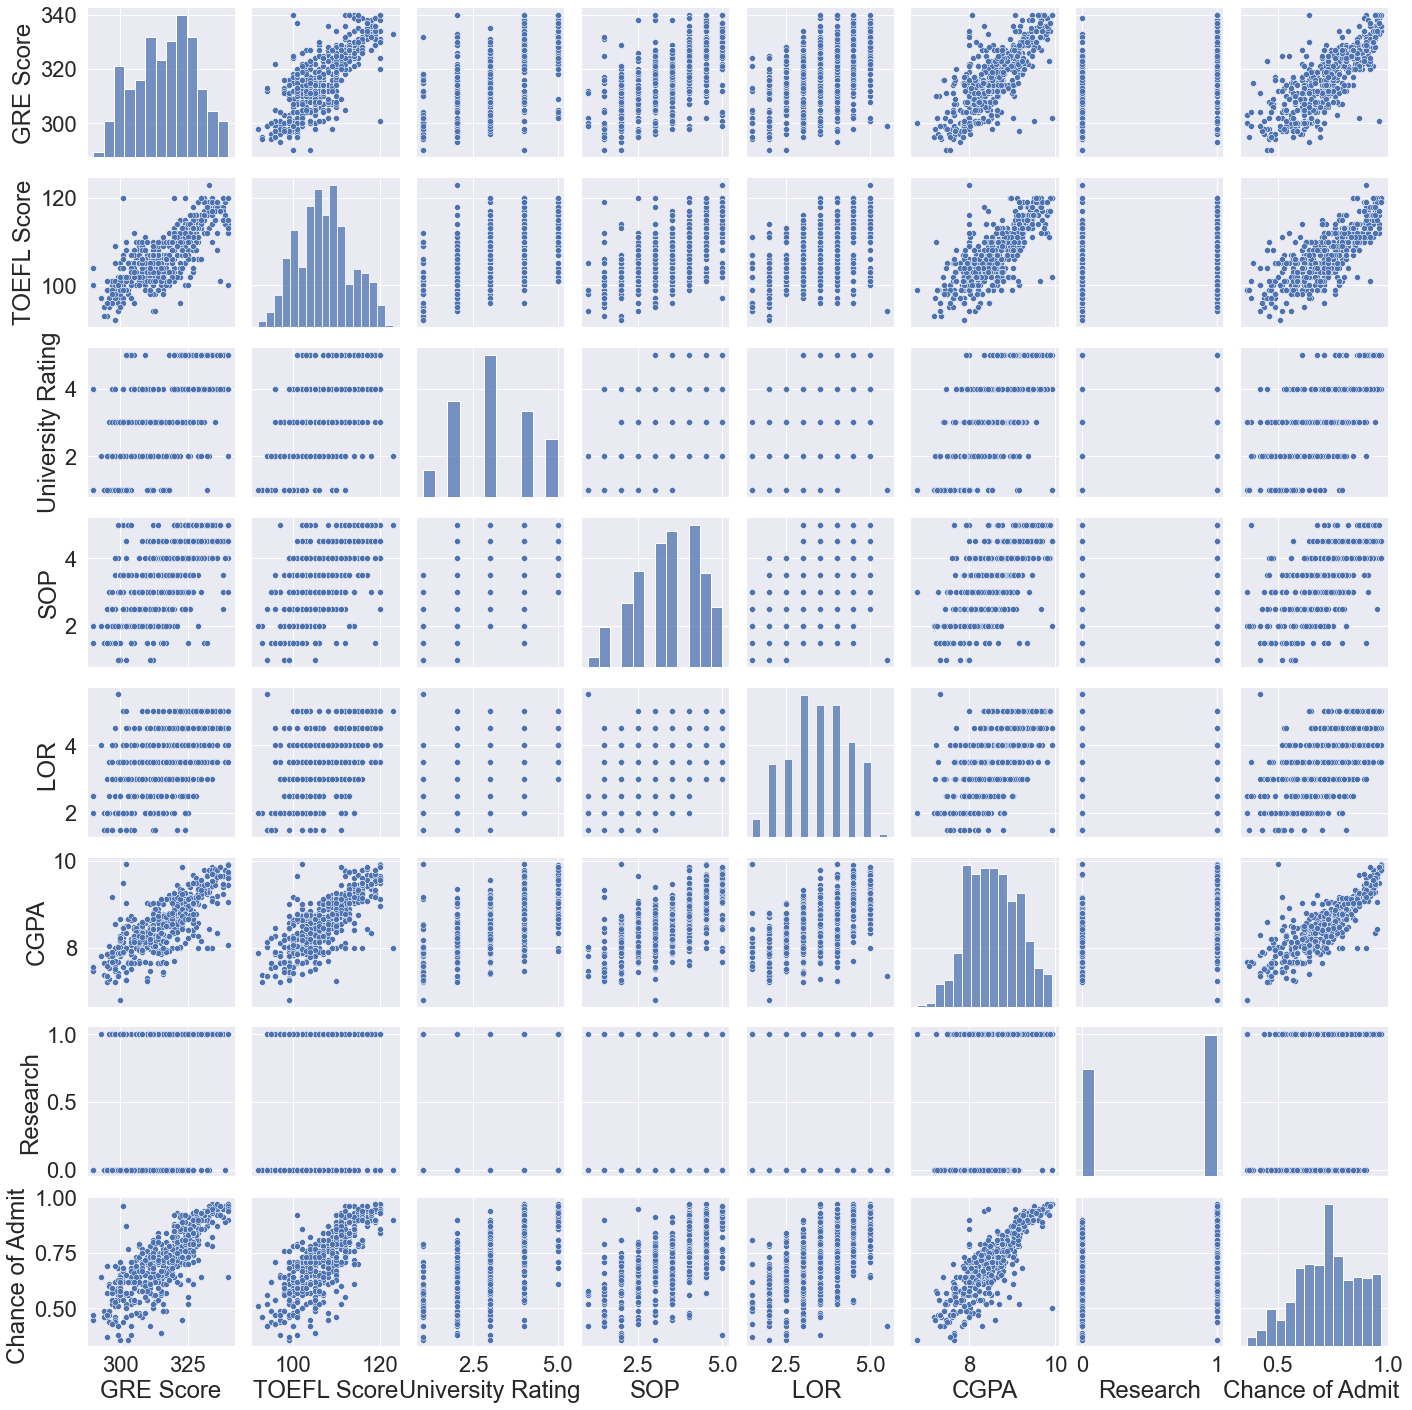

In [85]:
plt.figure(figsize=(30,30))
plt.rcParams.update({'font.size': 15})
sns.pairplot(data)

<a id="scatter_multicolinear"></a>
## <b style="color:black">Scatterplot to check multicolinearity</b>

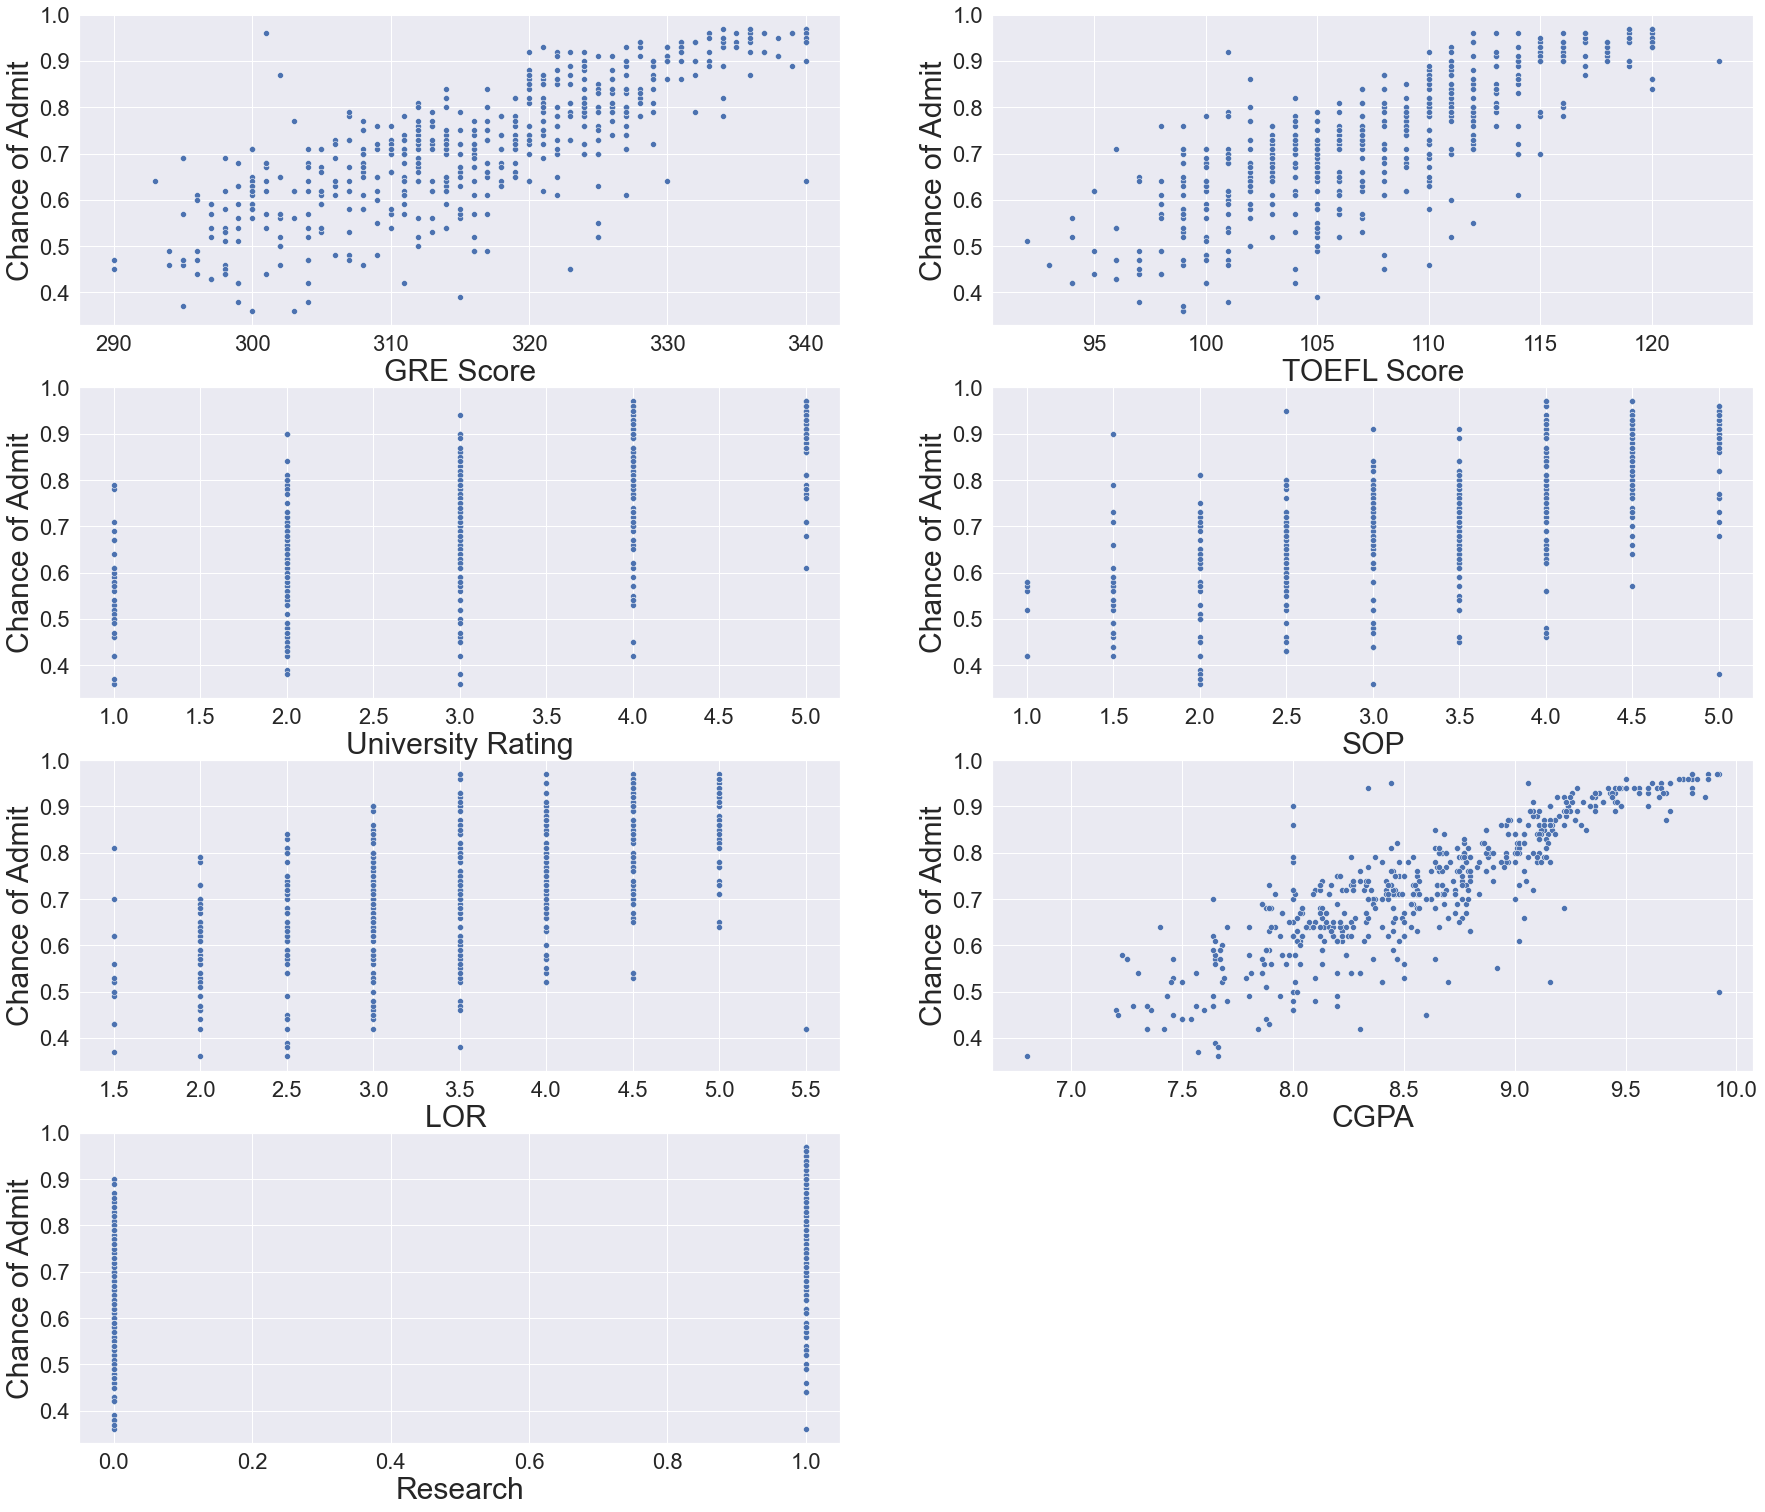

In [86]:
plt.figure(figsize=(30,40))
a=data.columns
j=1
for i in range(0,(data.shape[1]-1)):
    plt.subplot(6,2,j)
    sns.scatterplot(y=data['Chance of Admit '],x=data.iloc[:,i])
    plt.xlabel(a[i],size = 30)
    plt.ylabel('Chance of Admit', size = 30)
    j=j+1
    

<a id='datascaling'></a>
## <b style="color:black">Data scaling </b>

In [87]:
standarsc=StandardScaler()
data['GRE Score']=standarsc.fit_transform(data[['GRE Score']])

In [88]:
data['TOEFL Score']=standarsc.fit_transform(data[['TOEFL Score']])

In [89]:
data['CGPA']=standarsc.fit_transform(data[['CGPA']])

In [90]:
vif_data1=pd.DataFrame()

vif_data1['features']=data.columns

vif_data1['VIF']=[variance_inflation_factor(data.values,i) for i in range(0,len(data.columns))]

print(vif_data1)

            features        VIF
0          GRE Score   3.422455
1        TOEFL Score   3.241025
2  University Rating  22.138481
3                SOP  31.855214
4               LOR   26.434678
5               CGPA   3.055681
6           Research   3.420484
7   Chance of Admit   40.518036


In [91]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.789940,0.604213,0.591370,0.498483,0.772022,0.525439,0.780885
TOEFL Score,0.789940,1.000000,0.628321,0.626995,0.502061,0.769677,0.441799,0.787078
University Rating,0.604213,0.628321,1.000000,0.709731,0.558431,0.683603,0.429368,0.690041
SOP,0.591370,0.626995,0.709731,1.000000,0.598529,0.670474,0.409392,0.684674
LOR,0.498483,0.502061,0.558431,0.598529,1.000000,0.571382,0.328097,0.607398
CGPA,0.772022,0.769677,0.683603,0.670474,0.571382,1.000000,0.471330,0.847463
Research,0.525439,0.441799,0.429368,0.409392,0.328097,0.471330,1.000000,0.539784
Chance of Admit,0.780885,0.787078,0.690041,0.684674,0.607398,0.847463,0.539784,1.000000


In [92]:
X1=data.drop('Chance of Admit ',axis=1)

Y1=data['Chance of Admit ']

In [93]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)

In [94]:
model1=lm.fit(X1_train,Y1_train)

In [95]:
print("\033[1mIntercept: \033[0m",model1.intercept_)
print("\033[1mCoefficients: \033[0m",model1.coef_)

pred=model1.predict(X1_test)

print('\033[1mR^2:\033[0m', r2_score(Y1_test, pred))

accuracy=(explained_variance_score(Y1_test,pred))*100
print('\033[1mAccuracy:\033[0m',accuracy)
R2=r2_score(Y1_test, pred)
print('\033[1mRoot Mean Squared Error:\033[0m',rmse(Y1_test, pred))
Adj_r2 = 1 - (1-R2)*(len(Y1_test)-1)/(len(Y1_test)- X1_test.shape[1]-1)
print('\033[1mAdj_r2:\033[0m',Adj_r2)
residuals=np.array(Y1_test-pred)

Intercept:  0.5834753611993233
Coefficients:  [0.02176448 0.02512046 0.0102928  0.01171175 0.01446478 0.05086167
 0.02826882]
R^2: 0.7653170472606621
Accuracy: 76.64469258036004
Root Mean Squared Error: 0.0672644393244229
Adj_r2: 0.7537481693087229


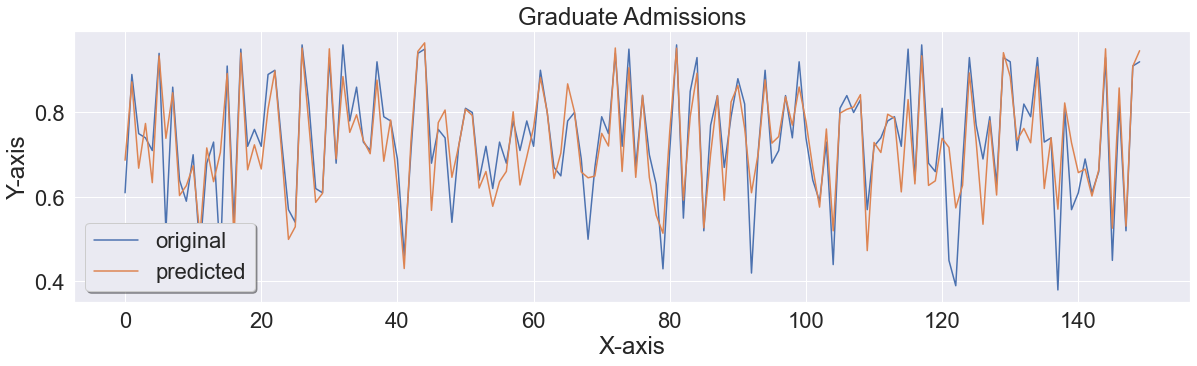

In [96]:
plt.figure(figsize=(20,5))
x_ax = range(len(Y1_test))
plt.plot(x_ax, Y1_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("Graduate Admissions")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

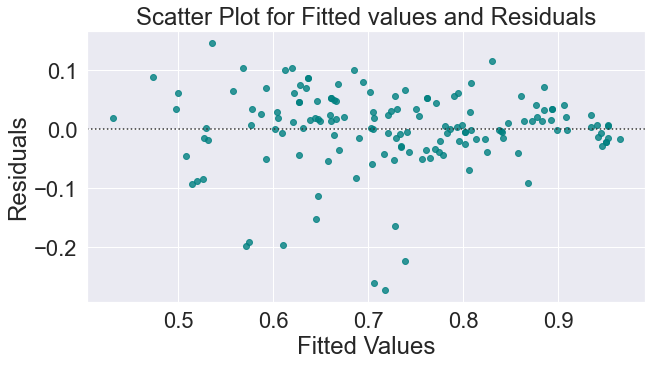

In [97]:
plt.figure(figsize=(10,5))
sns.residplot(x = pred, y = residuals, color='teal')
plt.title('Scatter Plot for Fitted values and Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [98]:
a = pd.Series({
                     'Model_Name': "Linear regression after Scaling",
                     'R-Squared': r2_score(Y_test, pred),
                     'Adj. R-Squared': Adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression,0.765317,0.753748
1,Linear regression after Scaling,0.765317,0.753748


In [99]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(lm, X1, Y1, scoring='r2',
                         cv=cv, n_jobs=-1)


In [100]:
R2=mean(absolute(scores))
print("r2:",mean(absolute(scores)))
Adj_r2 = 1-(1-R2)*(X1.shape[0]-1)/(X1.shape[0]-X1.shape[1]-1)
print('Adj_r2:',Adj_r2)

r2: 0.8006890033488994
Adj_r2: 0.7983242966089711


In [101]:
a = pd.Series({
                     'Model_Name': "Linear regression with KFold Cross validation",
                     'R-Squared': R2,
                     'Adj. R-Squared': Adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression,0.765317,0.753748
1,Linear regression after Scaling,0.765317,0.753748
2,Linear regression with KFold Cross validation,0.800689,0.798324


In [102]:
cv = RepeatedKFold(n_splits=10,n_repeats=10, random_state=1)

scores = cross_val_score(lm, X1, Y1, scoring='r2',
                         cv=cv, n_jobs=-1)
R2=mean(absolute(scores))
print("r2:",mean(absolute(scores)))

r2: 0.7933567490931078


In [103]:
Adj_r2 = 1-(1-R2)*(X1.shape[0]-1)/(X1.shape[0]-X1.shape[1]-1)
print('Adj_r2:',Adj_r2)

Adj_r2: 0.7909050495060769


In [104]:
a = pd.Series({
                     'Model_Name': "Linear regression with Repeated KFold Cross validation",
                     'R-Squared': R2,
                     'Adj. R-Squared': Adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression,0.765317,0.753748
1,Linear regression after Scaling,0.765317,0.753748
2,Linear regression with KFold Cross validation,0.800689,0.798324
3,Linear regression with Repeated KFold Cross va...,0.793357,0.790905


<a id='ridge'></a>
# <b style="color:black">Ridge Regression</b>

In [105]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='r2')

model.fit(X1, Y1)
print(model.alpha_)


0.99


In [106]:
R2=model.score(X1,Y1)
print(R2)

0.804673648771156


In [107]:
Adj_r2 = 1-(1-R2)*(X1.shape[0]-1)/(X1.shape[0]-X1.shape[1]-1)
print('Adj_r2:',Adj_r2)

Adj_r2: 0.80235621748539


In [108]:
pred=model.predict(X1_test)

In [109]:
print("RMSE: ",sqrt(mean_squared_error(Y1_test, pred)))

RMSE:  0.0666326207176942


In [110]:
print("MAE: ",sqrt(mean_absolute_error (Y1_test, pred)))

MAE:  0.21471612339143895


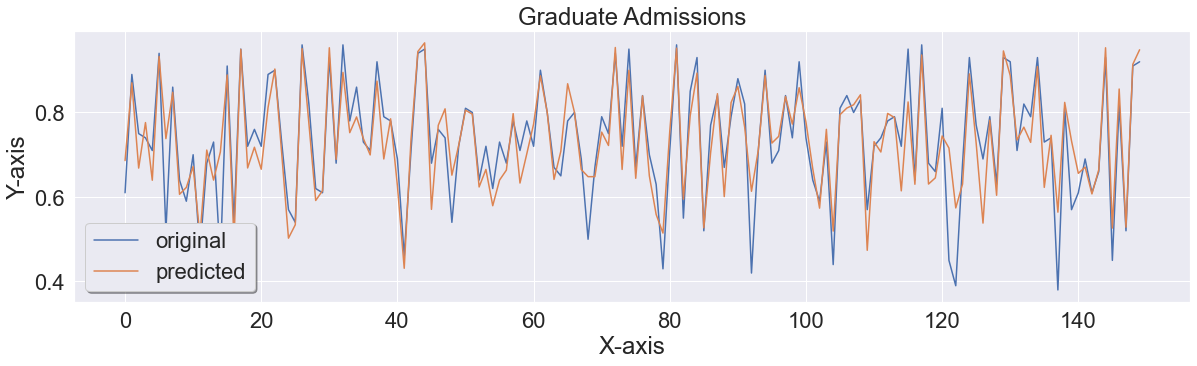

In [111]:
plt.figure(figsize=(20,5))
x_ax = range(len(Y1_test))
plt.plot(x_ax, Y1_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.title("Graduate Admissions")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [112]:
residuals=np.array(Y1_test-pred)

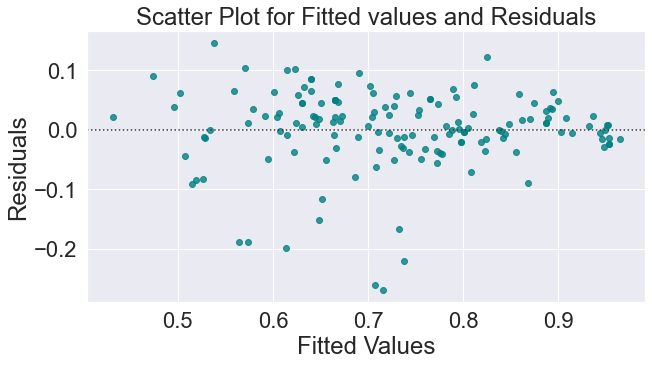

In [113]:
plt.figure(figsize=(10,5))
sns.residplot(x = pred, y = residuals, color='teal')
plt.title('Scatter Plot for Fitted values and Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [114]:
a = pd.Series({
                     'Model_Name': "Ridge Regression",
                     'R-Squared': R2,
                     'Adj. R-Squared': Adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression,0.765317,0.753748
1,Linear regression after Scaling,0.765317,0.753748
2,Linear regression with KFold Cross validation,0.800689,0.798324
3,Linear regression with Repeated KFold Cross va...,0.793357,0.790905
4,Ridge Regression,0.804674,0.802356


<a id="lasso"></a>
# <b style="color:black">Lasso Regression</b>

In [115]:
cv = RepeatedKFold(n_splits=10, n_repeats=10,random_state=1)

scores = cross_val_score(Lasso(alpha=0.001), X1, Y1, scoring='r2',
cv=cv, n_jobs=-1)
R2=mean(absolute(scores))
print(mean(absolute(scores)))

0.7932682523048039


In [116]:
Adj_r2 = 1-(1-R2)*(X1.shape[0]-1)/(X1.shape[0]-X1.shape[1]-1)
Adj_r2

0.7908155027558779

In [117]:
a = pd.Series({
                     'Model_Name': "Lasso Regression",
                     'R-Squared': R2,
                     'Adj. R-Squared': Adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression,0.765317,0.753748
1,Linear regression after Scaling,0.765317,0.753748
2,Linear regression with KFold Cross validation,0.800689,0.798324
3,Linear regression with Repeated KFold Cross va...,0.793357,0.790905
4,Ridge Regression,0.804674,0.802356
5,Lasso Regression,0.793268,0.790816


<a id='sgd'></a>
# <b style="color:black">SGD</b>

In [118]:
sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='elasticnet',random_state=42)
sgdr.fit(X1_train, Y1_train)

SGDRegressor(epsilon=0.01, eta0=0.1, penalty='elasticnet', random_state=42)

In [119]:
score = sgdr.score(X1_train, Y1_train)
print("R-squared:", score)

R-squared: 0.7161072157859919


In [120]:
Adj_r2 = 1 - (1-score)*(len(Y1_test)-1)/(len(Y1_test)- X1_test.shape[1]-1)
print('Adj_r2:\033[0m',Adj_r2)

Adj_r2: 0.7021125010712168


In [121]:
a = pd.Series({
                     'Model_Name': "SGD Regression",
                     'R-Squared': score,
                     'Adj. R-Squared': Adj_r2     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
comp = comp.append(a, ignore_index=True)

# print the result table
comp

,Model_Name,R-Squared,Adj. R-Squared
0,Linear regression,0.765317,0.753748
1,Linear regression after Scaling,0.765317,0.753748
2,Linear regression with KFold Cross validation,0.800689,0.798324
3,Linear regression with Repeated KFold Cross va...,0.793357,0.790905
4,Ridge Regression,0.804674,0.802356
5,Lasso Regression,0.793268,0.790816
6,SGD Regression,0.716107,0.702113


In [138]:
from IPython.display import Image
img = 'Model.PNG'
Image(url=img)